In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [15]:
! conda list | grep "python "
! conda list | grep cartopy
! conda list | grep matplotlib
! conda list | grep xarray
! conda list | grep iris

ipython                   7.3.0            py37h24bf2e0_0    conda-forge
msgpack-python            0.6.0            py37h2d50403_0    conda-forge
python                    3.7.1             h381d211_1002    conda-forge
cartopy                   0.17.0           py37h7547761_1    conda-forge
matplotlib                2.2.5                    pypi_0    pypi
iris                      2.2.0                 py37_1003    conda-forge
iris-sample-data          2.1.0                      py_0    conda-forge


In [ ]:

def plot_cross_dateline_xticks(central_longitude, limits):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitudegitude=central_longitude))

    ax.set_extent(limits, crs=ccrs.PlateCarree())
    ax.coastlines()

    xticks = ax.get_xticks()
    print(f'xticks: {xticks}')
    _ = ax.set_xticks(xticks, crs=ccrs.PlateCarree(central_longitude))
    _ = ax.set_yticks(ax.get_yticks(), crs=ccrs.PlateCarree(central_longitude))

    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid()

    return fig, ax

xticks: [-15. -10.  -5.   0.   5.  10.  15.  20.]


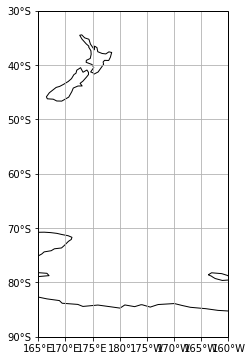

In [ ]:
central_longitude = 180
limits = [165, 200, -100, -30]
fig, ax = plot_cross_dateline_xticks(central_longitude, limits)

xticks: [-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]


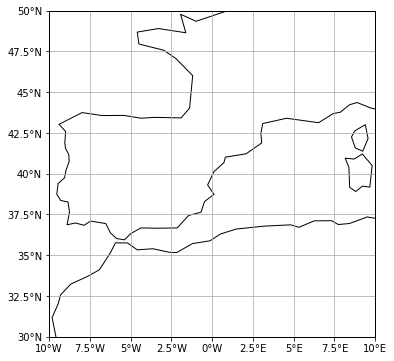

In [ ]:
central_longitude = 0
limits = [-10, 10, 30, 50]
fig, ax = plot_cross_dateline_xticks(central_longitude, limits)


# Plot iris

In [19]:
import iris

def plot_cube_xticks(cube2d, central_longitude=0):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitudegitude=central_longitude))

    # ax.set_extent(limits, crs=ccrs.PlateCarree())
    p1 = ax.pcolormesh(cube2d.coord('longitude').points, cube2d.coord('latitude').points, cube2d.data,
              transform=ccrs.PlateCarree())
    plt.colorbar(p1, ax=ax, orientation='horizontal')
    ax.coastlines()


    xticks = ax.get_xticks()
    print(f'xticks: {xticks}')
    _ = ax.set_xticks(xticks, crs=ccrs.PlateCarree(central_longitude))

    yticks = ax.get_yticks()
    print(f'yticks: {yticks}')
    yticks[0] = max(yticks[0], -90)
    yticks[-1] = min(yticks[-1], 90)
    print(f'yticks: {yticks}')

    _ = ax.set_yticks(yticks, crs=ccrs.PlateCarree(central_longitude))

    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid()

    return fig, ax

cube.shape, cube.min, cube.max      : (8, 13, 361, 441), 1.00e-15, 3.41e-05
cube2d.shape, cube2d.min, cube2d.max: (361, 441), 1.00e-15, 3.41e-05
xticks: [-80. -60. -40. -20.   0.  20.  40.  60.]
yticks: [-100.  -80.  -60.  -40.  -20.    0.   20.]
yticks: [-90. -80. -60. -40. -20.   0.  20.]


(<Figure size 720x432 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fb6108add68>)

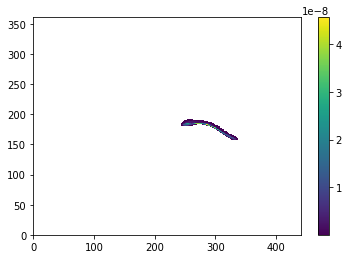

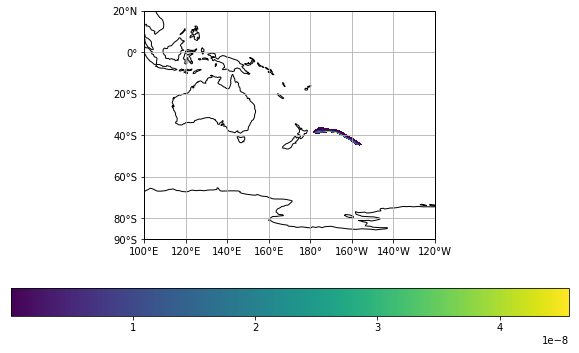

In [ ]:
filein = 'test/data/cdump_sum.nc'
air_concentration_name = 'Concentration Array - SUM '
mask_less = 1e-15
central_longitude = 180

cubes = iris.load(filein)
cube = cubes.extract(air_concentration_name)[0]
cube.data = np.ma.masked_less(cube.data, mask_less)
print(f'cube.shape, cube.min, cube.max      : {cube.shape}, {cube.data.min():.2e}, {cube.data.max():.2e}')

it=7
ilev=7
cube2d = cube[it,ilev,...]
print(f'cube2d.shape, cube2d.min, cube2d.max: {cube2d.shape}, {cube2d.data.min():.2e}, {cube2d.data.max():.2e}')
plt.pcolormesh(cube2d.data, cmap='viridis')
plt.colorbar()

plot_cube_xticks(cube2d, central_longitude=central_longitude)

cube.shape, cube.min, cube.max      : (2, 3, 601, 801), 1.02e-15, 1.86e+03
cube2d.shape, cube2d.min, cube2d.max: (601, 801), 1.02e-15, 1.86e+03
xticks: [-35. -30. -25. -20. -15. -10.  -5.   0.   5.  10.  15.]
yticks: [35. 40. 45. 50. 55. 60. 65. 70. 75.]
yticks: [35. 40. 45. 50. 55. 60. 65. 70. 75.]


(<Figure size 720x432 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fb610180470>)

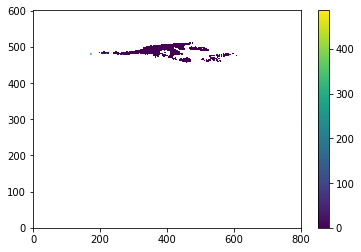

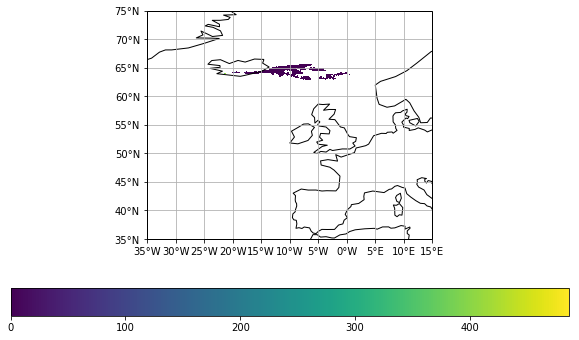

: 

In [ ]:


filein = 'test/data/hysplit_operational.nc'
air_concentration_name = 'Concentration Array - AS01'
mask_less = 1e-15
central_longitude = 0

cubes = iris.load(filein)
cube = cubes.extract(air_concentration_name)[0]
cube.data = np.ma.masked_less(cube.data, mask_less)
print(f'cube.shape, cube.min, cube.max      : {cube.shape}, {cube.data.min():.2e}, {cube.data.max():.2e}')

it=1
ilev=0
cube2d = cube[it,ilev,...]
print(f'cube2d.shape, cube2d.min, cube2d.max: {cube2d.shape}, {cube2d.data.min():.2e}, {cube2d.data.max():.2e}')
plt.pcolormesh(cube2d.data, cmap='viridis')
plt.colorbar()

plot_cube_xticks(cube2d, central_longitude=central_longitude)
